In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import integrate

Métodos númericos pode ser usado para integrar funções definidas, tanto na forma analítica quanto na forma tabular

In [ ]:
def func(x): return (x/10) * (np.exp(x))
x = np.linspace(0, 3, 7)
y = func(x)
plt.plot(x, y, color='green')
plt.grid(True)
plt.show()

In [ ]:
def eliminar_linha(lin, p, c, prt):
  c = c.astype(float)
  [N, M] = c.shape
  if prt:
    print("(L%d)=(L%d)-(%f)/(%f)*L(%d)" % (lin, lin, c[lin, p], c[p, p], p))
  m = c[lin, p] / c[p, p]
  c[lin, p:M+1]=c[lin,p:M+1]-m*c[p,p:M+1]
  return c, m

def pivotar_coluna(p,l_ini,l_fim,c,prt):
     [N,M]=c.shape
     linhas = np.arange(l_ini,l_fim)
     dist=np.argmax(abs(c[linhas,p]))
     if dist!=0:  #troca linhas
         c[[ p, (dist+p)],:] = c[[ (dist+p) , p ],:]
         if prt:
             print("Trocando linhas %d e %d" % (p,dist+p))
             pdtabulate=lambda c:tabulate(c,headers='keys')
             print(pdtabulate(c))
     return c, dist

def substituicao_regressiva(a, b, prt):
  [N,M]=a.shape
  x = np.zeros(N)*np.nan
  if a[N - 1, N - 1]!=0: x[N - 1]= b[N - 1] / a[N - 1, N - 1];
  if prt:
      print("Substituição regressiva\nx(%d)=%f" % (N-1,x[N-1]))
  for lin in range(N-2,-1,-1):
     if a[lin, lin]!=0:
       x[lin]=(b[lin]-a[lin,lin+1:N] @ x[lin+1:N])/a[lin,lin]
     if prt:
         print("x(%d)=%f" % (lin,x[lin]))
  return x

def substituicao_progressiva(a, b, prt):
  [N,M] = a.shape
  y = np.zeros(N)
  y[0]=b[0]
  if prt:
      print("Substituição Progressiva\ny(%d)=%f" % (1,y(1)))
  for lin in range(1,N):
        y[lin]= b[lin]-a[lin,0:lin] @ y[0:lin]
        if prt:
            print("y(%d)=%f" % (lin,y[lin]))
  return y

def eliminacao_gauss(a, b, prt, pivot): # com pivotamento
   a = a.astype(float)
   b = b.astype(float)
   C = np.c_[a, b]
   [N, M] = C.shape
   x = np.zeros(N)
   if prt:
       print("Matriz Aumentada [C=A|b]")
       print(C)
   for p in range(N-1):
       if pivot:
         (C,dist) = pivotar_coluna(p,p,N,C,prt)
       elif C[p, p] == 0:
          break
       if prt:
            print("Eliminando coluna %d com Pivô %f" % (p,C[p,p]) )
       for lin in range(p+1,N): #eliminação progressiva
           (C,m) = eliminar_linha(lin,p,C,prt)
       if prt:
           print(C)
   if C[p, p] != 0:
         x = substituicao_regressiva(C[:,0:N],C[:,N],prt)
   else:
         print("Não há solução única pois matriz A é singular")
         x[1:N] = np.inf
   return x

def polinomio_vandermonde(x,y):
   x = x. astype(np. float64)
   y = y. astype(np. float64)
   N = len(x)
   A = np.zeros((N,N))
   for k in range(N):
      A[:,k] = x**k
   coef=eliminacao_gauss(A,y,False,True)
   pv = np.poly1d(coef[-1::-1])
   return pv, A, coef

def Trapezios_tab(x,y,prt,plot):
   n=len(x)
   h=x[1]-x[0] #espaçamento
   w=np.ones(n)
   w[1:-1]=2
   S = y @ w
   I=(h/2)*S
   np.set_printoptions(precision=8)
   if (prt):
      print("[x y w y*w]")
      print(np.array([x,y,w,y*w]).transpose())
      print("h=%f\nsoma(y*w)=%f\nI=(%f)/2*(%f)\n" % (h,S,h,S))
      print("Integal por Trapézios %4d pontos = %f\n" % (n,I))
   if (plot):
      for i in range(0,n-1):
         (pv,A,coef)= polinomio_vandermonde(x[i:i+2],y[i:i+2])
         t = np.linspace(x[i],x[i+1],50);
         plt.plot(t,pv(t))
      plt.scatter(x,y)
      plt.xlabel("Integral por Trapézios " + str(n) + " pontos=" + "{:.5f}".format(I))
      plt.grid(True)
      plt.show()
   return I

def Trapezios(f,a,b,n,prt,plt1):
   x = np.linspace(a,b,n)
   y = f(x)
   I=Trapezios_tab(x,y,prt,False)
   if (plt1):
      t = np.linspace(x[0],x[n-1],100);
      plt.plot(t,f(t), color='red')
      plt.scatter(x,y)
      for i in range(0,n-1):
         (pv,A,coef)= polinomio_vandermonde(x[i:i+2],y[i:i+2])
         t = np.linspace(x[i],x[i+1],50);
         plt.plot(t,pv(t), color='black')
         plt.fill_between(t, pv(t), step="pre", alpha=0.2)
      (Ie,erro_e)=integrate.quad(f, a, b)
      erro = np.abs((Ie-I)/Ie)
      plt.xlabel("Integral por Trapézios " + str(n) + " pontos, erro=" + "{:.1e}".format(erro))
      plt.grid(True)
      plt.show()
   return I

In [ ]:
I = Trapezios(func, 0, 3, 7, True, True)

Métodos númericos pode ser usado para integrar funções definidas, tanto na forma analítica quanto na forma tabular

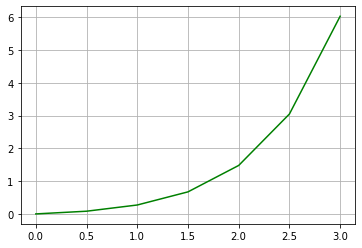

In [26]:
def func(x): return (x/10) * (np.exp(x))
x = np.linspace(0, 3, 7)
y = func(x)
plt.plot(x, y, color='green')
plt.grid(True)
plt.show()

In [34]:
def eliminar_linha(lin, p, c, prt):
  c = c.astype(float)
  [N, M] = c.shape
  if prt:
    print("(L%d)=(L%d)-(%f)/(%f)*L(%d)" % (lin, lin, c[lin, p], c[p, p], p))
  m = c[lin, p] / c[p, p]
  c[lin, p:M+1]=c[lin,p:M+1]-m*c[p,p:M+1]
  return c, m

def pivotar_coluna(p,l_ini,l_fim,c,prt):
     [N,M]=c.shape
     linhas = np.arange(l_ini,l_fim)
     dist=np.argmax(abs(c[linhas,p]))
     if dist!=0:  #troca linhas
         c[[ p, (dist+p)],:] = c[[ (dist+p) , p ],:]
         if prt:
             print("Trocando linhas %d e %d" % (p,dist+p))
             pdtabulate=lambda c:tabulate(c,headers='keys')
             print(pdtabulate(c))
     return c, dist

def substituicao_regressiva(a, b, prt):
  [N,M]=a.shape
  x = np.zeros(N)*np.nan
  if a[N - 1, N - 1]!=0: x[N - 1]= b[N - 1] / a[N - 1, N - 1];
  if prt:
      print("Substituição regressiva\nx(%d)=%f" % (N-1,x[N-1]))
  for lin in range(N-2,-1,-1):
     if a[lin, lin]!=0:
       x[lin]=(b[lin]-a[lin,lin+1:N] @ x[lin+1:N])/a[lin,lin]
     if prt:
         print("x(%d)=%f" % (lin,x[lin]))
  return x

def substituicao_progressiva(a, b, prt):
  [N,M] = a.shape
  y = np.zeros(N)
  y[0]=b[0]
  if prt:
      print("Substituição Progressiva\ny(%d)=%f" % (1,y(1)))
  for lin in range(1,N):
        y[lin]= b[lin]-a[lin,0:lin] @ y[0:lin]
        if prt:
            print("y(%d)=%f" % (lin,y[lin]))
  return y

def eliminacao_gauss(a, b, prt, pivot): # com pivotamento
   a = a.astype(float)
   b = b.astype(float)
   C = np.c_[a, b]
   [N, M] = C.shape
   x = np.zeros(N)
   if prt:
       print("Matriz Aumentada [C=A|b]")
       print(C)
   for p in range(N-1):
       if pivot:
         (C,dist) = pivotar_coluna(p,p,N,C,prt)
       elif C[p, p] == 0:
          break
       if prt:
            print("Eliminando coluna %d com Pivô %f" % (p,C[p,p]) )
       for lin in range(p+1,N): #eliminação progressiva
           (C,m) = eliminar_linha(lin,p,C,prt)
       if prt:
           print(C)
   if C[p, p] != 0:
         x = substituicao_regressiva(C[:,0:N],C[:,N],prt)
   else:
         print("Não há solução única pois matriz A é singular")
         x[1:N] = np.inf
   return x

def polinomio_vandermonde(x,y):
   x = x. astype(np. float64)
   y = y. astype(np. float64)
   N = len(x)
   A = np.zeros((N,N))
   for k in range(N):
      A[:,k] = x**k
   coef=eliminacao_gauss(A,y,False,True)
   pv = np.poly1d(coef[-1::-1])
   return pv, A, coef

def Trapezios_tab(x,y,prt,plot):
   n=len(x)
   h=x[1]-x[0] #espaçamento
   w=np.ones(n)
   w[1:-1]=2
   S = y @ w
   I=(h/2)*S
   np.set_printoptions(precision=8)
   if (prt):
      print("[x y w y*w]")
      print(np.array([x,y,w,y*w]).transpose())
      print("h=%f\nsoma(y*w)=%f\nI=(%f)/2*(%f)\n" % (h,S,h,S))
      print("Integal por Trapézios %4d pontos = %f\n" % (n,I))
   if (plot):
      for i in range(0,n-1):
         (pv,A,coef)= polinomio_vandermonde(x[i:i+2],y[i:i+2])
         t = np.linspace(x[i],x[i+1],50);
         plt.plot(t,pv(t))
      plt.scatter(x,y)
      plt.xlabel("Integral por Trapézios " + str(n) + " pontos=" + "{:.5f}".format(I))
      plt.grid(True)
      plt.show()
   return I

def Trapezios(f,a,b,n,prt,plt1):
   x = np.linspace(a,b,n)
   y = f(x)
   I=Trapezios_tab(x,y,prt,False)
   if (plt1):
      t = np.linspace(x[0],x[n-1],100);
      plt.plot(t,f(t), color='red')
      plt.scatter(x,y)
      for i in range(0,n-1):
         (pv,A,coef)= polinomio_vandermonde(x[i:i+2],y[i:i+2])
         t = np.linspace(x[i],x[i+1],50);
         plt.plot(t,pv(t), color='black')
         plt.fill_between(t, pv(t), step="pre", alpha=0.2)
      (Ie,erro_e)=integrate.quad(f, a, b)
      erro = np.abs((Ie-I)/Ie)
      plt.xlabel("Integral por Trapézios " + str(n) + " pontos, erro=" + "{:.1e}".format(erro))
      plt.grid(True)
      plt.show()
   return I

[x y w y*w]
[[0.         0.         1.         0.        ]
 [0.5        0.08243606 2.         0.16487213]
 [1.         0.27182818 2.         0.54365637]
 [1.5        0.67225336 2.         1.34450672]
 [2.         1.47781122 2.         2.95562244]
 [2.5        3.04562349 2.         6.09124698]
 [3.         6.02566108 1.         6.02566108]]
h=0.500000
soma(y*w)=17.125566
I=(0.500000)/2*(17.125566)

Integal por Trapézios    7 pontos = 4.281391



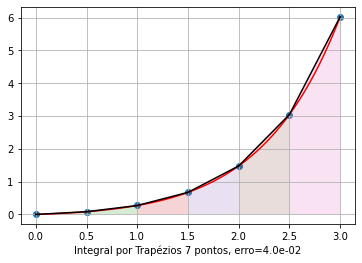

In [35]:
I = Trapezios(func, 0, 3, 7, True, True)